In [1]:
!pip3 install opencv-contrib-python
!pip3 install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [20]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog.jpg
Saving dog_full.jpg to dog_full.jpg
Saving hand.jpg to hand.jpg
Saving hand_full.jpg to hand_full.jpg


In [24]:
dog = cv2.imread('dog.jpg')
dog_full = cv2.imread('dog_full.jpg')
hand = cv2.imread('hand.jpg')
hand_full = cv2.imread('hand_full.jpg')

In [23]:
def sift_detector(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    return keypoints1, descriptors1, keypoints2, descriptors2


In [21]:
def bf_opencv_matcher(kps1, des1, kps2, des2, img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = bf.knnMatch(des1, des2, k=2) 

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

  
    img3 = cv2.drawMatchesKnn(img1, kps1, img2, kps2, good[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show() 

In [32]:
def mmatcher(kps1, des1, kps2, des2, img1, img2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img3 = cv2.drawMatches(img1, kps1, img2, kps2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()

In [25]:
def show_img(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')

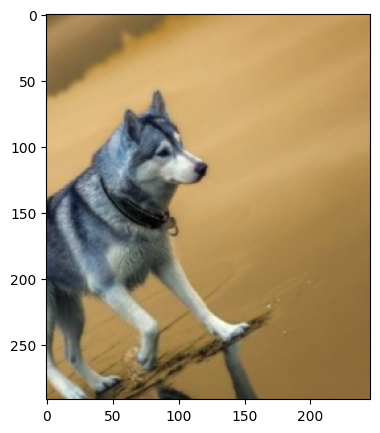

In [26]:
show_img(dog)

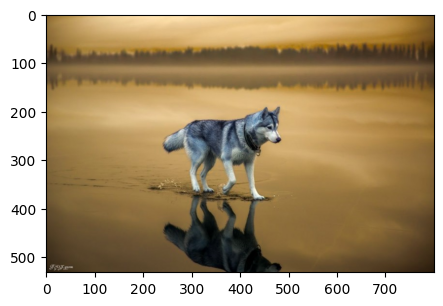

In [27]:
show_img(dog_full)

In [30]:
kps1, des1, kps2, des2 = sift_detector(dog, dog_full)

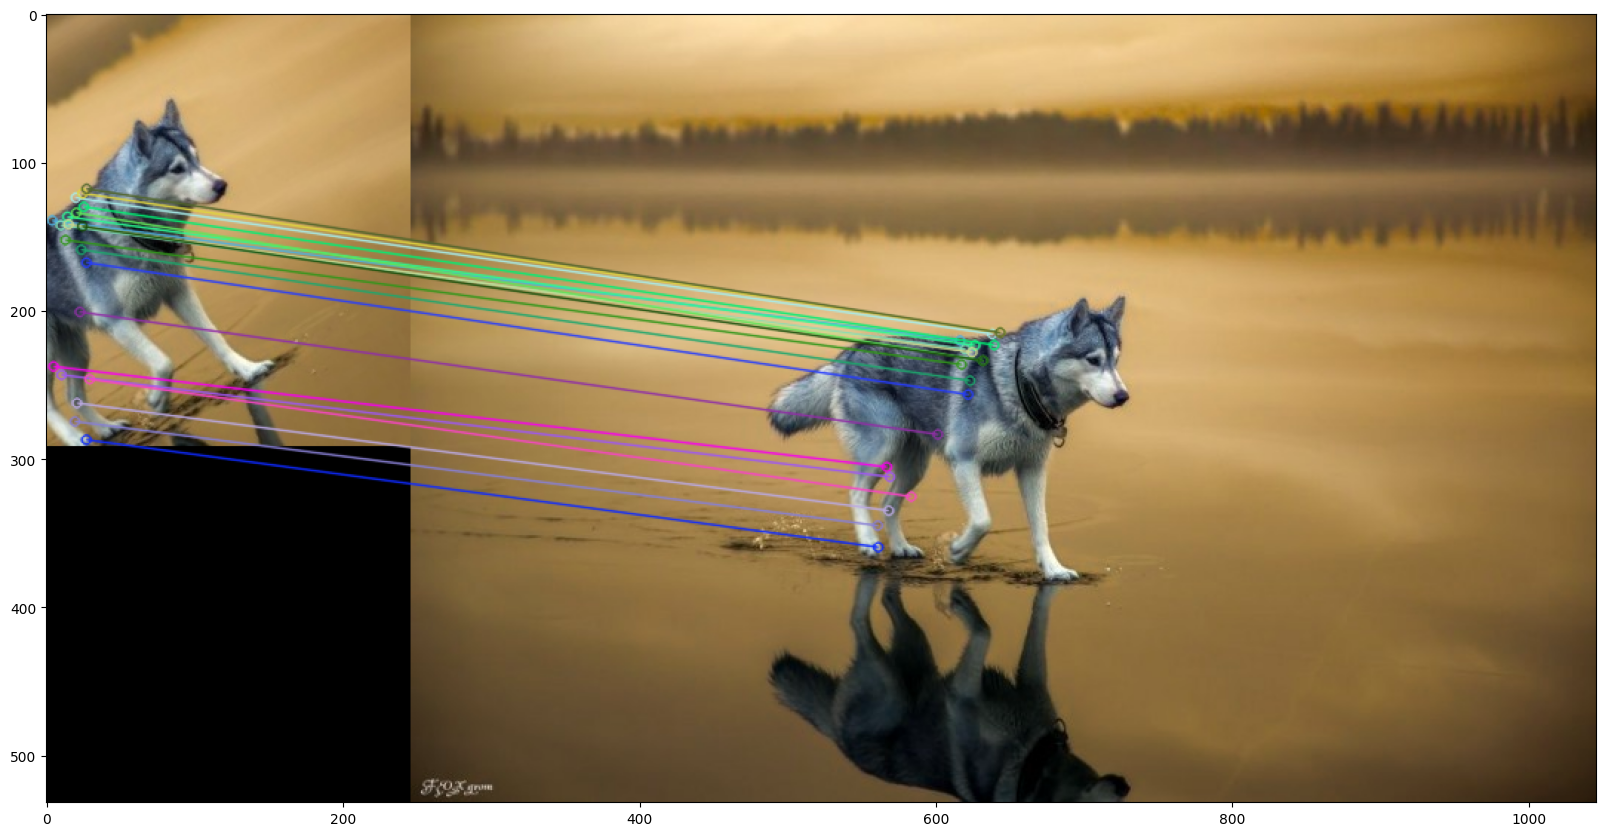

In [33]:
bf_opencv_matcher(kps1, des1, kps2, des2, dog, dog_full)

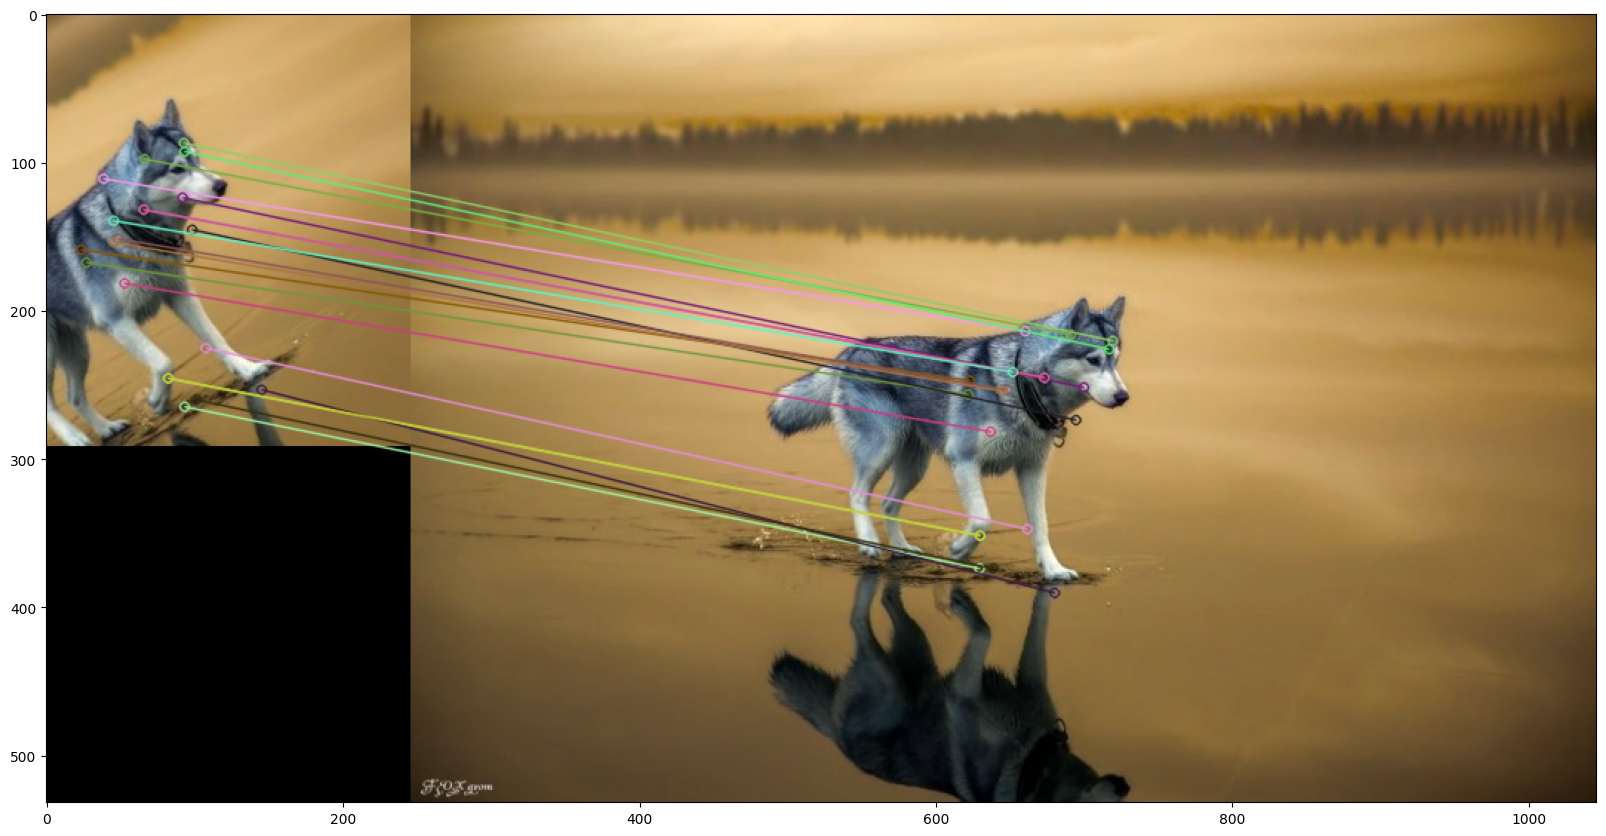

In [34]:
mmatcher(kps1, des1, kps2, des2, dog, dog_full)

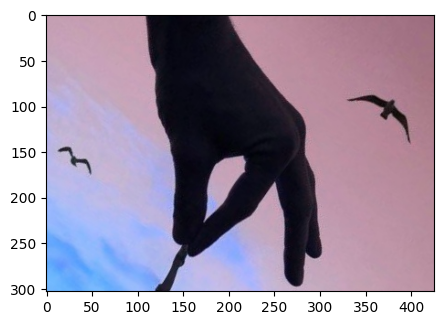

In [28]:
show_img(hand)

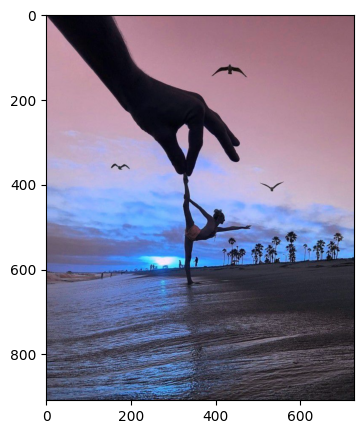

In [29]:
show_img(hand_full)

In [35]:
kps1, des1, kps2, des2 = sift_detector(hand, hand_full)

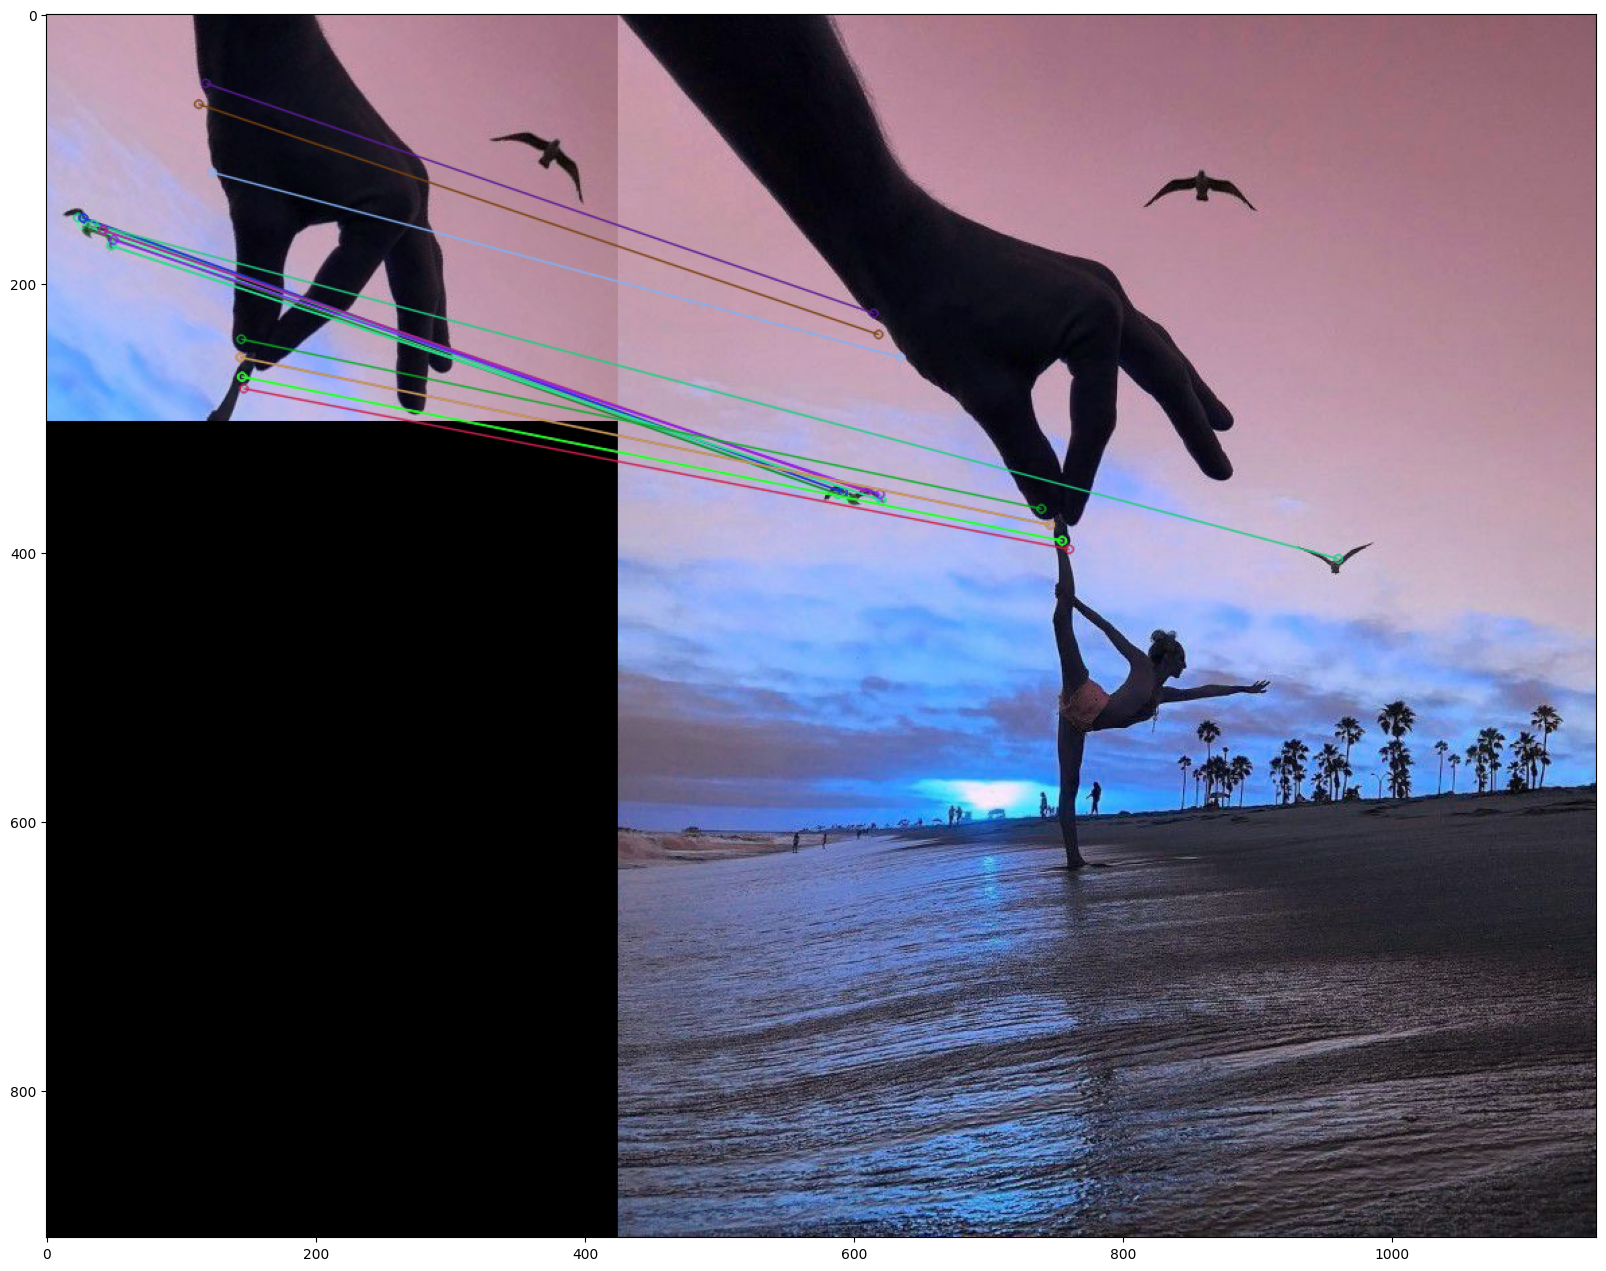

In [36]:
bf_opencv_matcher(kps1, des1, kps2, des2, hand, hand_full)

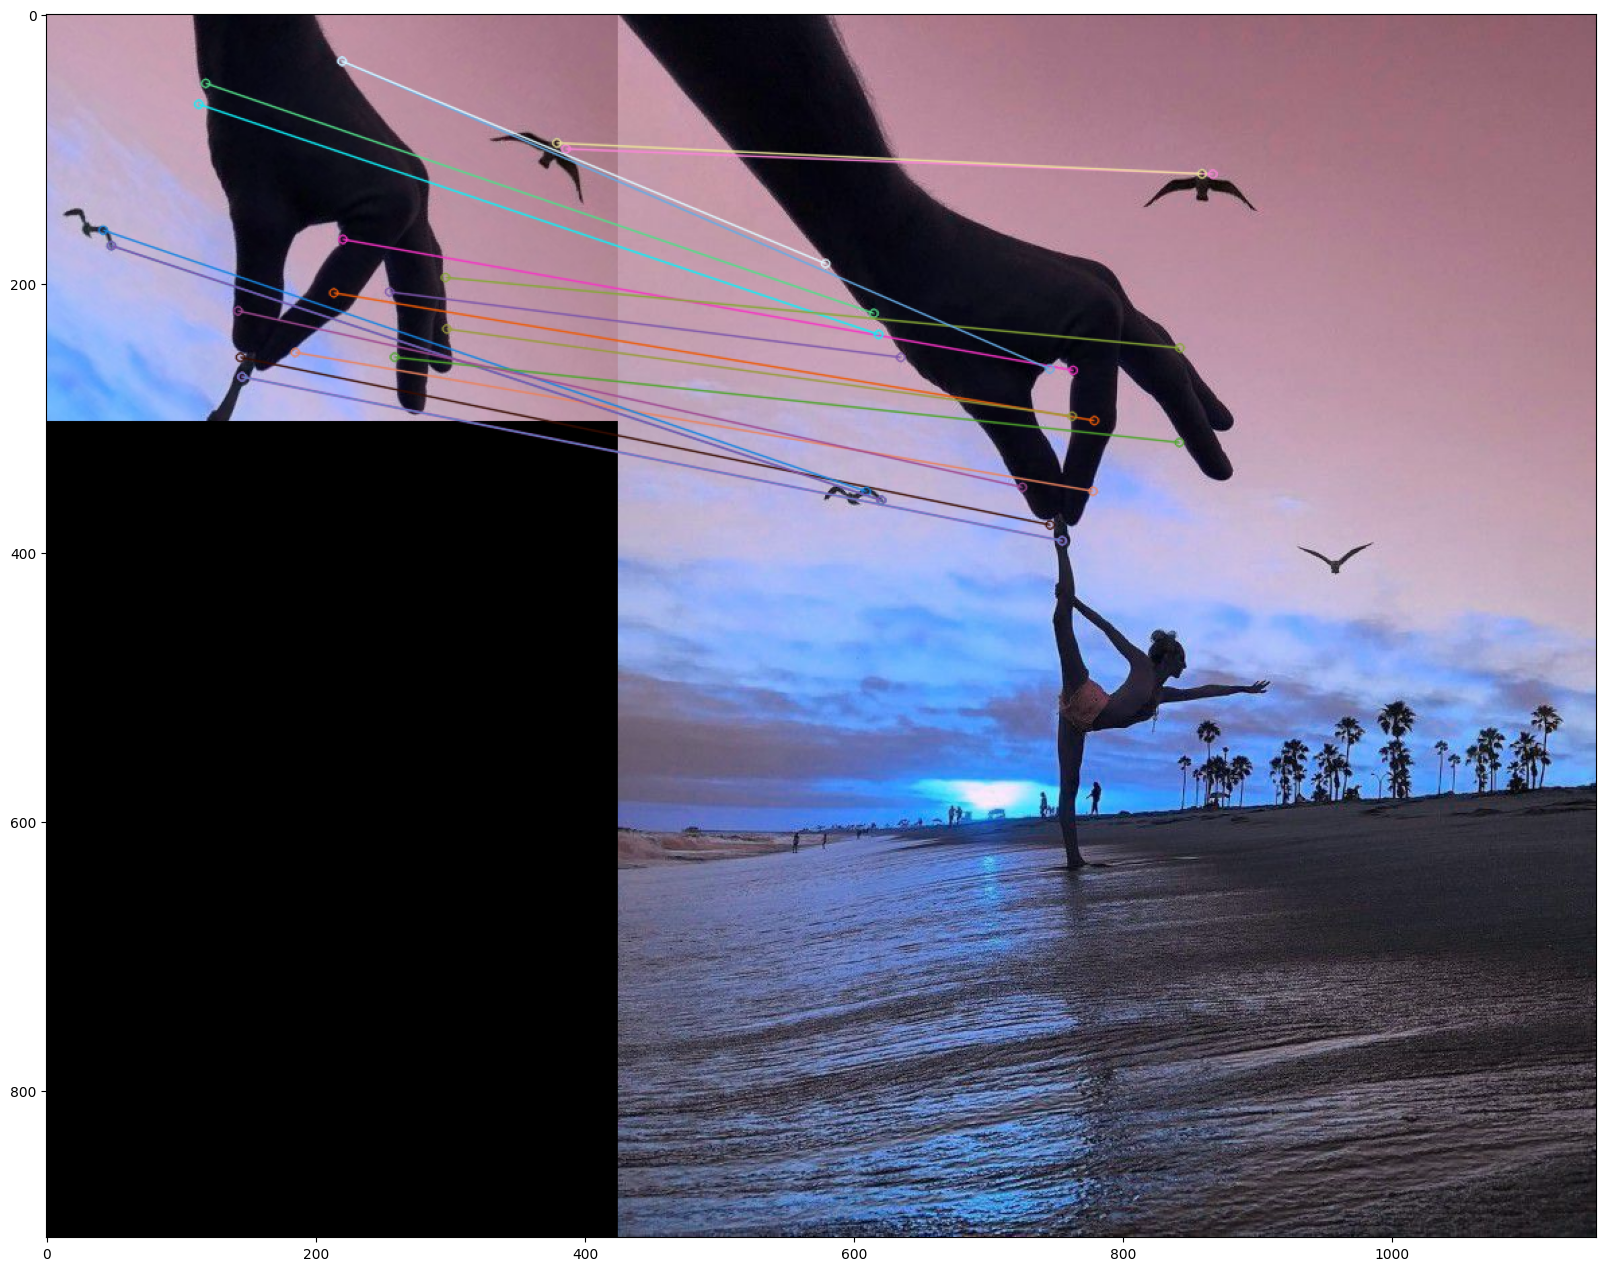

In [37]:
mmatcher(kps1, des1, kps2, des2, hand, hand_full)